# WiCHORD+ Simulator Implementation in Python
Created by Christos-Panagiotis Balatsouras
ORCID: https://orcid.org/0000-0001-8914-7559

## Use Case: Chord-Based Routing Evaluation on Wireless Sensor Networks

Simulation Experiments:
1. Key (Node IDs) Storage Efficiency per node & Load Balancing
2. Energy Efficiency
3. MAC Address Hashing for Node ID Assignment Collision Rate

In [1]:
# Import Python Modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import secrets
import random
import pandas as pd

In [2]:
# Import modules from this project
from globals import hash_space_bits
from network_build import network_build
from SensorNode import SensorNode
from Query import Query

In [3]:
# Global Variables
# ...

### Function Definitions

In [16]:
def create_random_wsn(num_of_nodes):
    """
    Function to create random WSNs with nodes of random generated mac addresses
    :param num_of_nodes: the desired total num of nodes on the WSN
    :return: the created and built WSN instance with the initial nodes joined
    """
    # Create random sensor node mac addresses to add to the network
    nodes_list = []
    for n in range(0, num_of_nodes + 1):
        mac_addr = secrets.token_hex(6)  # Generate random MAC addresses
        nodes_list.append(SensorNode(mac_addr, None))  # add random node to list
    # Sort the list of nodes by NODE ID
    nodes_list.sort(key=lambda node: node.node_id)
    
    # Add the above random sensor nodes to a new empty network
    sensornet = network_build(nodes_list)
    
    return sensornet

### Main Application

In [4]:
print("+-----------------------------------+")
print("|                                   |")
print("|        Wi-CHORD+ Simulator        |")
print("|                                   |")
print("+-----------------------------------+")
print("Chord Protocol Application on Wireless Sensor Networks")
print("Implementation by Christos-Panagiotis Mpalatsouras")
print("ORCID: orcid.org/0000-0001-8914-7559")

+-----------------------------------+
|                                   |
|        Wi-CHORD+ Simulator        |
|                                   |
+-----------------------------------+
Chord Protocol Application on Wireless Sensor Networks
Implementation by Christos-Panagiotis Mpalatsouras
ORCID: orcid.org/0000-0001-8914-7559


In [5]:
total_runs_per_experiment = int(input("Please Specify the total runs per experiment: "))
minimum_nodes = int(input("Please Specify the minimum num of nodes on the network: "))
maximum_nodes = int(input("Please Specify the maximum num of nodes on the network: "))
step = int(input("Please specify the total nodes increment step: "))

#### Simulation #1: Key Load Balancing

In [6]:
print("\nExperiment: Measuring the Average NodeID Storage per total number of Nodes\n")


Experiment: Measuring the Average NodeID Storage per total number of Nodes


In [17]:
# Main Simulation for Storage Efficiency
results = []  # list to store the results
for total_nodes in range(minimum_nodes, maximum_nodes, step):
    print("\nRunning Experiment with total nodes: ", total_nodes)
    
    # Create a random WSN with random sensor node MAC Addresses
    wsn = create_random_wsn(total_nodes)
    
    # Export the network's list of nodes
    list_of_nodes = wsn.List_of_Nodes
    
    # ---- Find the average number of node IDs stored in the memory of each node ----
    sum_of_contacts = 0  # the total sum of node contacts
    for node in list_of_nodes:
        node.update_total_num_of_contacts()
        sum_of_contacts = sum_of_contacts + node.contacts_num  # update the total sum of node contacts
    
    local_average = sum_of_contacts / total_nodes
    local_result = {
        "Nodes": total_nodes, 
        "Avg_Num_of_Contacts": local_average
    }
    results.append(local_result)


Running Experiment with total nodes:  10

Running Experiment with total nodes:  20

Running Experiment with total nodes:  30

Running Experiment with total nodes:  40

Running Experiment with total nodes:  50

Running Experiment with total nodes:  60

Running Experiment with total nodes:  70

Running Experiment with total nodes:  80

Running Experiment with total nodes:  90

Running Experiment with total nodes:  100

Running Experiment with total nodes:  110

Running Experiment with total nodes:  120

Running Experiment with total nodes:  130

Running Experiment with total nodes:  140

Running Experiment with total nodes:  150

Running Experiment with total nodes:  160

Running Experiment with total nodes:  170

Running Experiment with total nodes:  180

Running Experiment with total nodes:  190

Running Experiment with total nodes:  200

Running Experiment with total nodes:  210

Running Experiment with total nodes:  220

Running Experiment with total nodes:  230

Running Experiment 

In [18]:
results

[{'Nodes': 10, 'Avg_Num_of_Contacts': 4.2},
 {'Nodes': 20, 'Avg_Num_of_Contacts': 5.45},
 {'Nodes': 30, 'Avg_Num_of_Contacts': 5.533333333333333},
 {'Nodes': 40, 'Avg_Num_of_Contacts': 6.475},
 {'Nodes': 50, 'Avg_Num_of_Contacts': 6.8},
 {'Nodes': 60, 'Avg_Num_of_Contacts': 6.95},
 {'Nodes': 70, 'Avg_Num_of_Contacts': 7.1571428571428575},
 {'Nodes': 80, 'Avg_Num_of_Contacts': 7.1},
 {'Nodes': 90, 'Avg_Num_of_Contacts': 7.311111111111111},
 {'Nodes': 100, 'Avg_Num_of_Contacts': 7.58},
 {'Nodes': 110, 'Avg_Num_of_Contacts': 7.6},
 {'Nodes': 120, 'Avg_Num_of_Contacts': 7.95},
 {'Nodes': 130, 'Avg_Num_of_Contacts': 7.684615384615385},
 {'Nodes': 140, 'Avg_Num_of_Contacts': 7.821428571428571},
 {'Nodes': 150, 'Avg_Num_of_Contacts': 8.013333333333334},
 {'Nodes': 160, 'Avg_Num_of_Contacts': 8.125},
 {'Nodes': 170, 'Avg_Num_of_Contacts': 8.4},
 {'Nodes': 180, 'Avg_Num_of_Contacts': 8.3},
 {'Nodes': 190, 'Avg_Num_of_Contacts': 8.51578947368421},
 {'Nodes': 200, 'Avg_Num_of_Contacts': 8.555},
 

In [19]:
# Convert results array of dicts to Pandas DataFrame
results_df = pd.DataFrame(results)
results_df

,Nodes,Avg_Num_of_Contacts
0,10,4.200000
1,20,5.450000
2,30,5.533333
3,40,6.475000
4,50,6.800000
...,...,...
95,960,10.746875
96,970,10.795876
97,980,10.817347
98,990,10.783838


In [20]:
# Plot the simulation experiment results
# Set the appearance parameters for the plots
mpl.rcParams['figure.figsize'] = [30, 15]
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 30
mpl.rcParams['axes.labelsize'] = 25

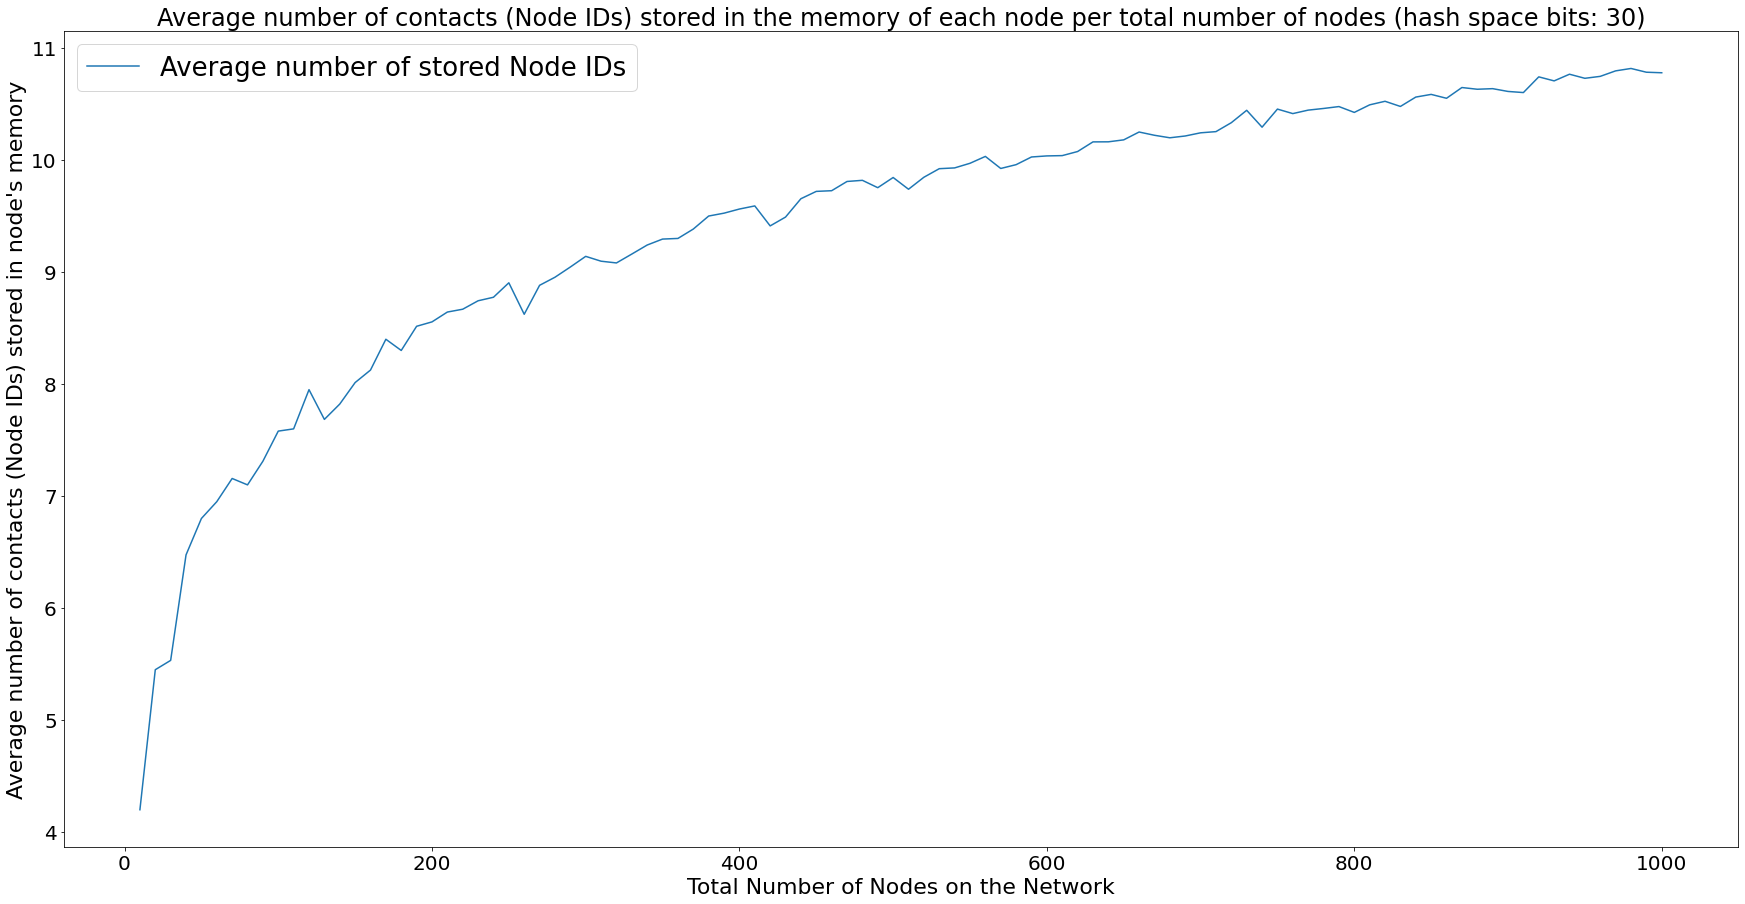

In [21]:
# Show the plot/plots
plt.plot(
    results_df["Nodes"], 
    results_df["Avg_Num_of_Contacts"], 
    label="Average number of stored Node IDs"
)
plt.ylabel("Average number of contacts (Node IDs) stored in node's memory", fontsize=22)
plt.xlabel("Total Number of Nodes on the Network", fontsize=22)
plt.title("Average number of contacts (Node IDs) stored in the memory of each node per total number of nodes (hash space bits: "+str(hash_space_bits)+")", fontsize=24)
plt.legend(prop={'size': 26})
plt.show()

#### Simulation #2: Energy Efficiency and total energy consumption (Node Join Operation)

In [23]:
print("\nExperiment: Measuring the number of nodes involved for a node join query\n")


Experiment: Measuring the number of nodes involved for a node join query


In [ ]:
# Main Simulation for Join Operation Energy Efficiency
results = []  # list to store the results
for total_nodes in range(minimum_nodes, maximum_nodes, step):
    print("\nRunning Experiment with total nodes: ", total_nodes)
    
    # Create a random WSN with random sensor node MAC Addresses
    wsn = create_random_wsn(total_nodes)
    
    # Export the network's list of nodes
    list_of_nodes = wsn.List_of_Nodes
    
    # TO-DO: Pick a random node to sign-in and then perform the simulation experiment